In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
]
DATA_PATH = "data/bank/bank-full.csv"
OUTPUT_DIR = "data/data_outputs_bank"
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [ ]:
# Load data
df = pd.read_csv(DATA_PATH, sep=';')  # Note the separator!
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())


Dataset shape: (45211, 17)
Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [ ]:

# Strip whitespace
df.columns = df.columns.str.strip()

In [5]:
# Check target class balance
print("\nTarget distribution:")
print(df['y'].value_counts(normalize=True))



Target distribution:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [ ]:

# Encode categorical attributes
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [ ]:

# Sokit for training and holdout
train_df, holdout_df = train_test_split(
    df_encoded,
    test_size=0.25,
    stratify=df_encoded["y"],
    random_state=42
)


In [ ]:
# Save splits to CSV
train_df.to_csv(os.path.join(OUTPUT_DIR, "train_df_bank.csv"), index=False)
holdout_df.to_csv(os.path.join(OUTPUT_DIR, "holdout_df_bank.csv"), index=False)


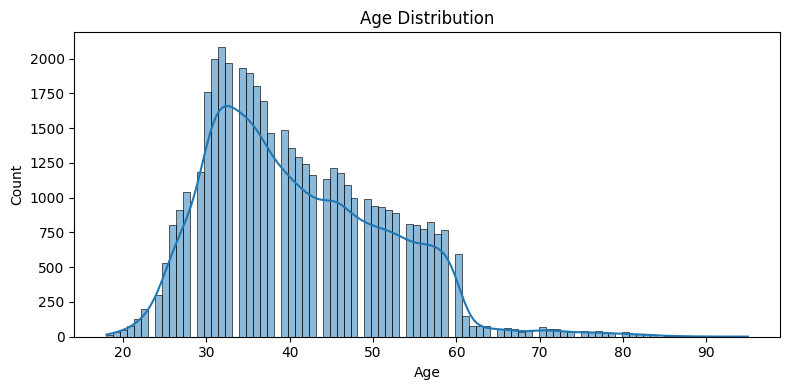

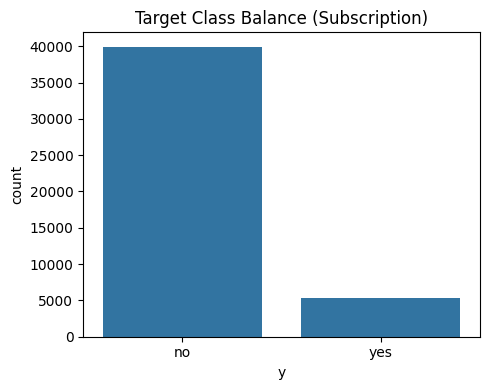

In [ ]:
# CHeck age dist. in real dataset
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "bank_age_distribution.png"))
plt.show()

# Plot class balance
plt.figure(figsize=(5, 4))
sns.countplot(x="y", data=df)
plt.title("Target Class Balance (Subscription)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "bank_target_balance.png"))
plt.show()


In [ ]:
# Check shapoes after split
print("\nTrain shape:", train_df.shape)
print("Holdout shape:", holdout_df.shape)


Train shape: (33908, 17)
Holdout shape: (11303, 17)
